In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df_original = pd.read_csv('train.csv')

In [3]:
df_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_numerico = df_original.select_dtypes(include='number').drop(['PassengerId', 'Survived', 'Pclass'], axis=1)

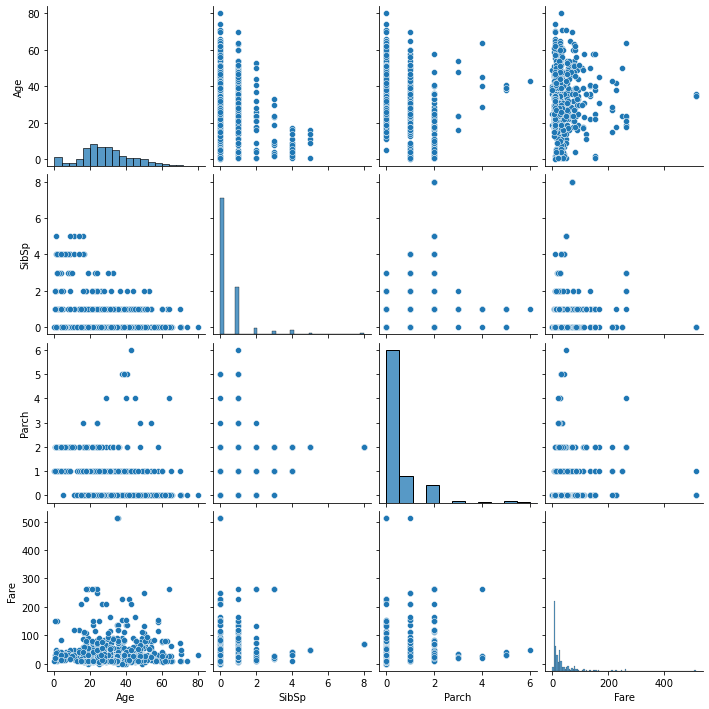

In [6]:
sns.pairplot(data=df_numerico)

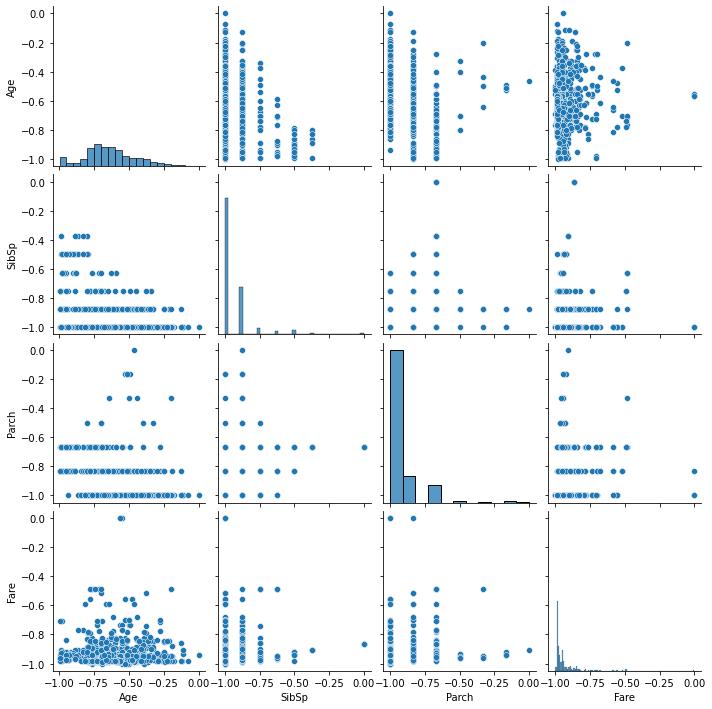

In [7]:
#Escala Máxima Absoluta
escala_max_abs = (df_numerico - df_numerico.max()) / df_numerico.max()

sns.pairplot(data=escala_max_abs)

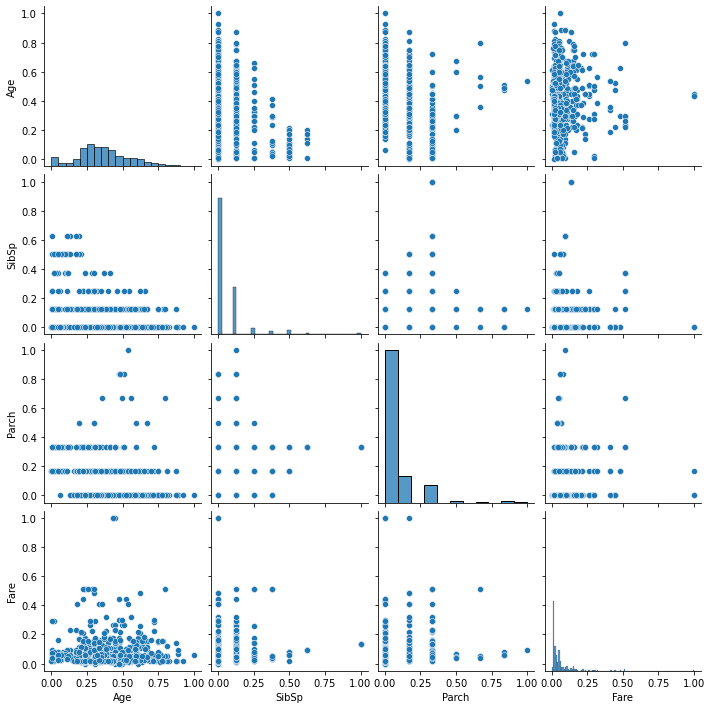

In [8]:
#Escala Min-Max
escala_min_max = (df_numerico - df_numerico.min())/ (df_numerico.max() - df_numerico.min())

sns.pairplot(data=escala_min_max)

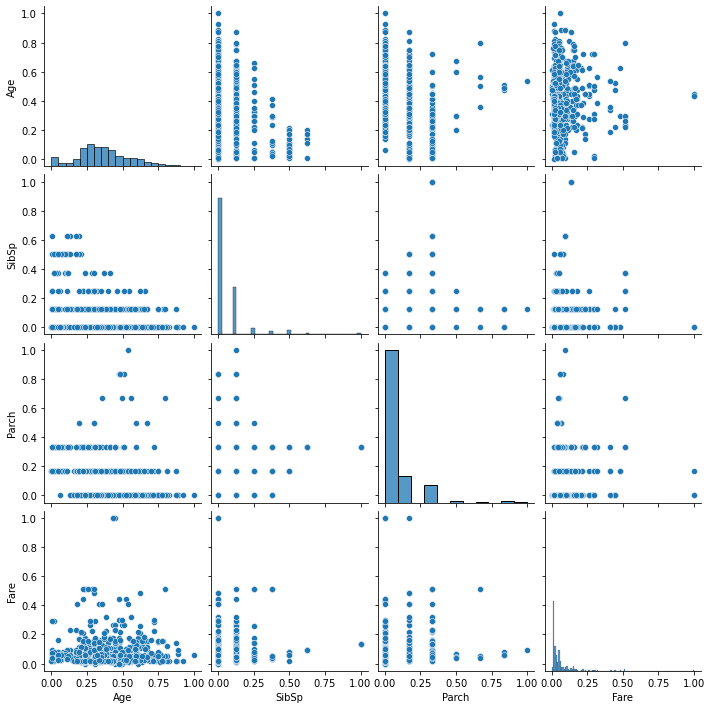

In [9]:
#Escala Min-Max com Sklearn
scaled_data = MinMaxScaler().fit_transform(df_numerico)
scaled_df = pd.DataFrame(scaled_data, columns=df_numerico.columns)

sns.pairplot(data=scaled_df)

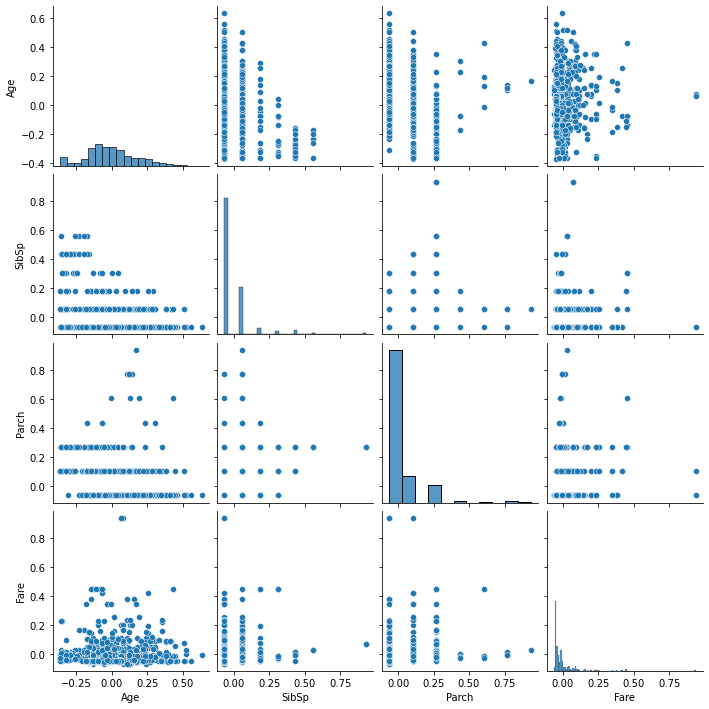

In [10]:
#Normalização
normalizacao = (df_numerico - df_numerico.mean()) / (df_numerico.max() - df_numerico.min())

sns.pairplot(data=normalizacao)

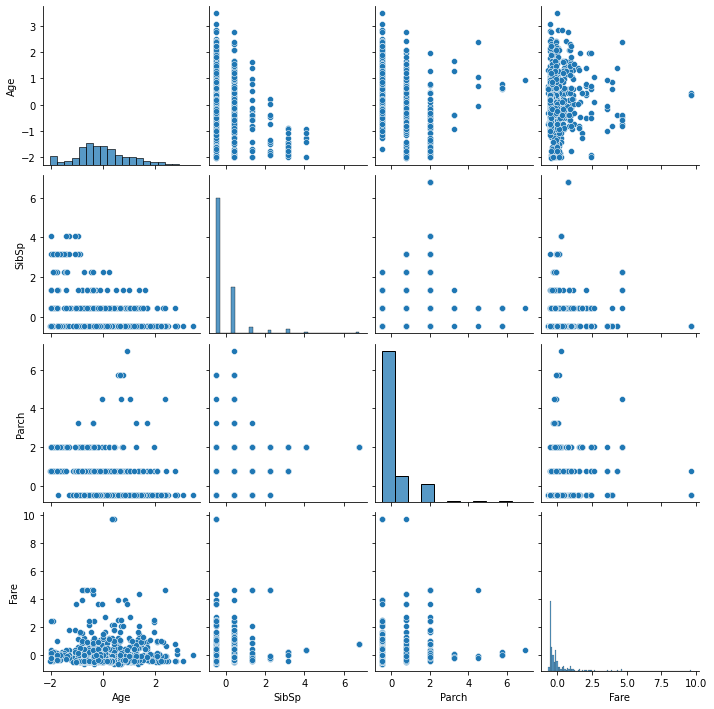

In [11]:
#Padronização
padronizacao = (df_numerico - df_numerico.mean())/ (df_numerico.std())

sns.pairplot(data=padronizacao)

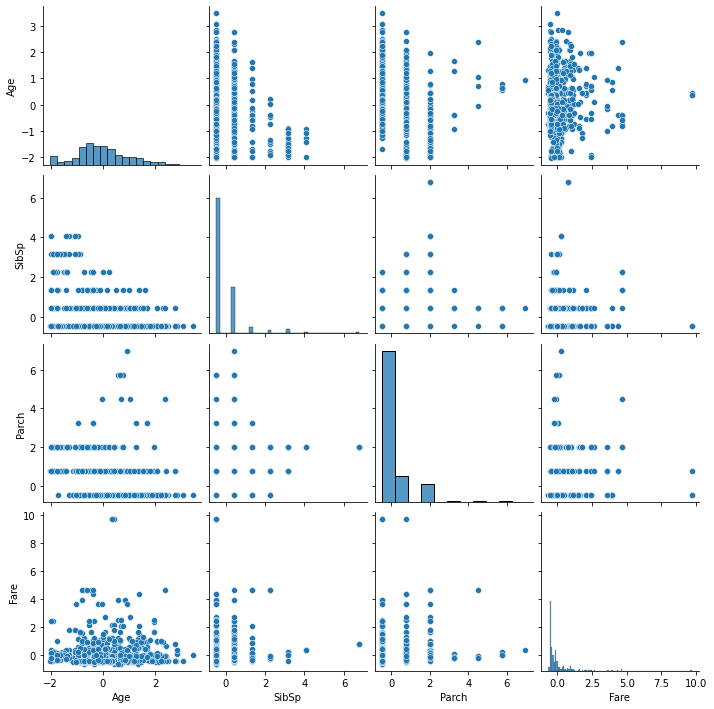

In [12]:
#Padronização com Sklearn
standard_data = StandardScaler().fit_transform(df_numerico)
standard_df = pd.DataFrame(standard_data, columns=df_numerico.columns)

sns.pairplot(data=standard_df)

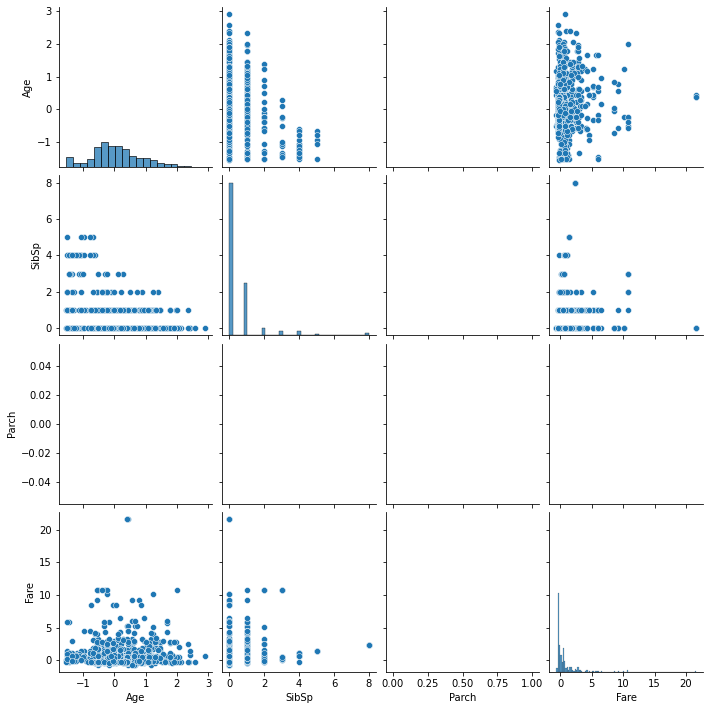

In [13]:
#Robust Scaler
robust = (df_numerico - df_numerico.median()) / (df_numerico.quantile(q=.75) - df_numerico.quantile(q=.25))

sns.pairplot(data=robust)

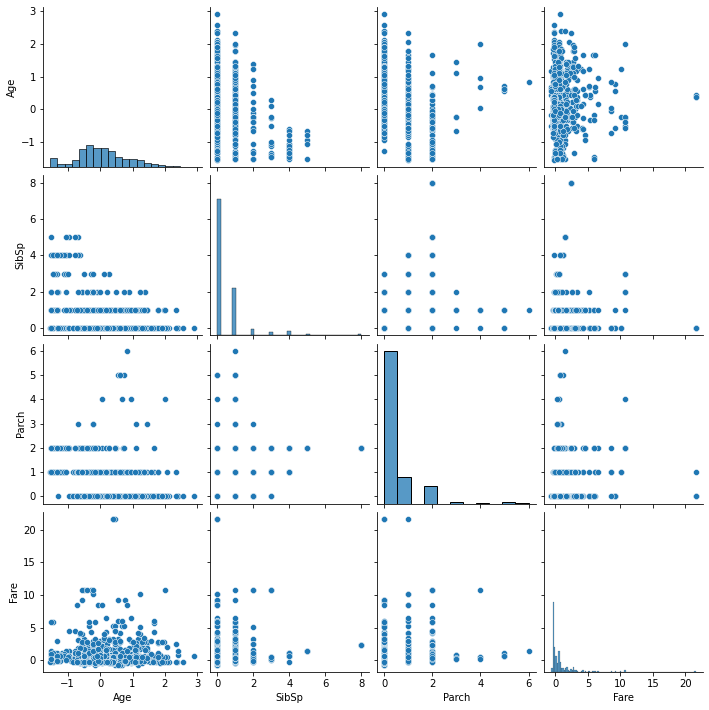

In [14]:
#Robust Scaler com Sklearn
robust_data = RobustScaler(quantile_range=(25.0, 75.0), with_centering=True).fit_transform(df_numerico)
robust_df = pd.DataFrame(robust_data, columns=df_numerico.columns)

sns.pairplot(data=robust_df)

In [15]:
df_categorico = df_original.drop(columns=df_numerico.columns)
df_categorico

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,211536,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,111369,C148,C


In [16]:
#rotulacao quando é importante a ordem, nivel hierarquico | se aumento da base for ruim

In [27]:
#codificação de rótulos
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_categorico['Cabin'] = label_encoder.fit_transform(df_categorico['Cabin'])

In [18]:
#codificação one-hot

one_hot_encoded_data = pd.get_dummies(df_categorico, columns=['Survived', 'Sex', 'Embarked'])

In [23]:
one_hot_encoded_data

,PassengerId,Pclass,Name,Ticket,Cabin,Survived_0,Survived_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",A/5 21171,147,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,81,0,1,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,147,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,55,0,1,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",373450,147,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",211536,147,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",112053,30,0,1,1,0,0,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,147,1,0,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",111369,60,0,1,0,1,1,0,0


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(df_categorico[['Survived', 'Sex', 'Embarked']])
encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(['Survived', 'Sex', 'Embarked']))

In [21]:
encoded_df

,Survived_0,Survived_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
